In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('IHME-GDB-Risk-all.csv')

In [3]:
countries_with_most_deathes=['India', 'Pakistan', 'Bangladesh' ,'Nepal', 'Afghanistan' ,'Saudi Arabia' ,'Kuwait' ,'Qatar', 'Bahrain']

In [4]:
df_ozon=pd.read_csv('pollution_ozone.csv')

In [5]:
df_ozon=df_ozon.loc[df_ozon['Country'].isin(countries_with_most_deathes)]
df_ozon=df_ozon[['Country','ISO3', 'Exposure Mean', 'Year', 'Pollutant', 'Units']]

In [6]:
df_pm25=pd.read_csv('pollution_pm25.csv')

In [7]:
df_pm25=df_pm25.loc[df_pm25['Country'].isin(countries_with_most_deathes)]
df_pm25=df_pm25[['Country','ISO3', 'Exposure Mean', 'Year', 'Pollutant', 'Units']]

In [8]:
df_co2=pd.read_csv('owid-co2-data.csv')

In [9]:
df_co2=df_co2.loc[df_co2['country'].isin(countries_with_most_deathes)]
df_co2=df_co2[['country','iso_code', 'year', 'co2']]

In [10]:
df1=df_co2.rename(columns={'country':'Country','iso_code':'ISO3','year':'Year'})
df1['Units_co2']='ton'
df1

,Country,ISO3,Year,co2,Units_co2
0,Afghanistan,AFG,1949,0.015,ton
1,Afghanistan,AFG,1950,0.084,ton
2,Afghanistan,AFG,1951,0.092,ton
3,Afghanistan,AFG,1952,0.092,ton
4,Afghanistan,AFG,1953,0.106,ton
...,...,...,...,...,...
19683,Saudi Arabia,SAU,2016,639.056,ton
19684,Saudi Arabia,SAU,2017,639.378,ton
19685,Saudi Arabia,SAU,2018,621.953,ton
19686,Saudi Arabia,SAU,2019,622.413,ton


In [11]:
df_all_pollutions=pd.merge(df_ozon ,df_pm25 , on=['Country','ISO3','Year'], suffixes=("_ozon", "_pm25"))

In [12]:
df_all_pollutions

,Country,ISO3,Exposure Mean_ozon,Year,Pollutant_ozon,Units_ozon,Exposure Mean_pm25,Pollutant_pm25,Units_pm25
0,Afghanistan,AFG,56.6,1990,ozone,pbb,49.3,pm25,µg/m3
1,Afghanistan,AFG,54.7,1995,ozone,pbb,48.6,pm25,µg/m3
2,Afghanistan,AFG,56.3,2000,ozone,pbb,51.6,pm25,µg/m3
3,Afghanistan,AFG,53.6,2005,ozone,pbb,46.2,pm25,µg/m3
4,Afghanistan,AFG,53.0,2010,ozone,pbb,51.8,pm25,µg/m3
...,...,...,...,...,...,...,...,...,...
121,Saudi Arabia,SAU,56.8,2015,ozone,pbb,66.8,pm25,µg/m3
122,Saudi Arabia,SAU,58.2,2016,ozone,pbb,59.6,pm25,µg/m3
123,Saudi Arabia,SAU,59.3,2017,ozone,pbb,63.9,pm25,µg/m3
124,Saudi Arabia,SAU,57.9,2018,ozone,pbb,61.9,pm25,µg/m3


In [13]:
df_all_pollutions=pd.merge(df_all_pollutions ,df1 , on=['Country','ISO3','Year'])

In [14]:
df_all_pollutions=df_all_pollutions.loc[df_all_pollutions.Year==2019]

In [15]:
countries_with_most_deathes_orderd=pd.DataFrame({'Country':['India', 'Pakistan', 'Bangladesh' ,'Nepal', 'Afghanistan' ,'Saudi Arabia' ,'Kuwait' ,'Qatar', 'Bahrain'],
                                               'rank':[1,2,3,4,5,6,7,8,9]})

In [16]:
countries_with_most_deathes_orderd

,Country,rank
0,India,1
1,Pakistan,2
2,Bangladesh,3
3,Nepal,4
4,Afghanistan,5
5,Saudi Arabia,6
6,Kuwait,7
7,Qatar,8
8,Bahrain,9


In [17]:
df_all_pollutions=pd.merge(df_all_pollutions ,countries_with_most_deathes_orderd , on=['Country'])

In [18]:
df_all_pollutions.Year=df_all_pollutions.Year.astype('str')

In [19]:
df_all_pollutions=df_all_pollutions.sort_values('rank')

In [20]:
df_all_pollutions=df_all_pollutions.set_index('rank')

In [21]:
df_all_pollutions

,Country,ISO3,Exposure Mean_ozon,Year,Pollutant_ozon,Units_ozon,Exposure Mean_pm25,Pollutant_pm25,Units_pm25,co2,Units_co2
rank,,,,,,,,,,,
1,India,IND,66.2,2019,ozone,pbb,83.2,pm25,µg/m3,2625.968,ton
2,Pakistan,PAK,63.3,2019,ozone,pbb,62.6,pm25,µg/m3,234.289,ton
3,Bangladesh,BGD,64.6,2019,ozone,pbb,63.4,pm25,µg/m3,94.215,ton
4,Nepal,NPL,67.0,2019,ozone,pbb,83.1,pm25,µg/m3,16.967,ton
5,Afghanistan,AFG,54.1,2019,ozone,pbb,52.4,pm25,µg/m3,12.147,ton
6,Saudi Arabia,SAU,58.2,2019,ozone,pbb,61.5,pm25,µg/m3,622.413,ton
7,Kuwait,KWT,62.1,2019,ozone,pbb,61.0,pm25,µg/m3,96.651,ton
8,Qatar,QAT,67.2,2019,ozone,pbb,76.0,pm25,µg/m3,115.037,ton
9,Bahrain,BHR,64.0,2019,ozone,pbb,59.2,pm25,µg/m3,34.439,ton


In [22]:
df_all_pollutions.max(axis=1)

C:\Users\MAHBOO~1\AppData\Local\Temp/ipykernel_16464/1880337349.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_all_pollutions.max(axis=1)


rank
1    2625.968
2     234.289
3      94.215
4      83.100
5      54.100
6     622.413
7      96.651
8     115.037
9      64.000
dtype: float64

In [28]:
df_all_pollutions.idxmax(axis=1)

TypeError: reduction operation 'argmax' not allowed for this dtype

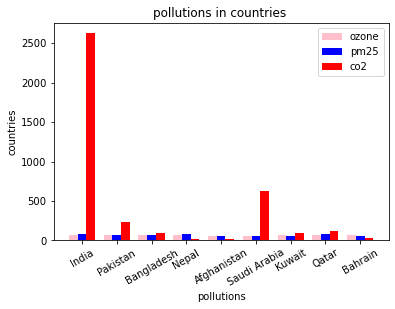

In [31]:
import matplotlib.pyplot as plt
  
N =9
ind = np.arange(N) 
width = 0.25
  
xvals = df_all_pollutions['Exposure Mean_ozon']
bar1 = plt.bar(ind, xvals, width, color = 'pink')
  
yvals = df_all_pollutions['Exposure Mean_pm25']
bar2 = plt.bar(ind+width, yvals, width, color='blue')
  
zvals = df_all_pollutions['co2']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'red')
  
plt.xlabel("pollutions")
plt.ylabel('countries')
plt.title("pollutions in countries ")
  
plt.xticks(ind+width,df_all_pollutions['Country'],rotation=30)
plt.legend( (bar1, bar2, bar3), ('ozone', 'pm25', 'co2') )
plt.show()